In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/77993017/finding-the-intersection-of-several-curves-in-python

In [2]:
c1080 = np.array([0.0063 , -0.1260 , 1.0146, -4.2147, 10.4717, 14.9473])
c720 = np.array([0.0179 , -0.3148 , 2.1038, -6.7798, 11.6871, 15.5829])
c540 = np.array([0.0189 , -0.3332 , 2.2272, -7.1543, 12.0520, 15.3168])
c360 = np.array([0.0178 , -0.3181 , 2.1672, -7.0761, 11.6511, 15.8349])

In [3]:
curves = [c1080, c720, c540, c360]
labels = ["1080p", "720p", "540p", "360p"]

In [4]:
xlin = np.linspace(0, 6, 100)

In [5]:
np.roots(c1080 - c720)

array([ 7.19666881+0.j        ,  4.11941032+2.23825508j,
        4.11941032-2.23825508j,  1.14334481+0.j        ,
       -0.30297219+0.j        ])

In [13]:
def factory(c1, c2):
    def wrapped(x):
        return np.poly1d(c1 -c2)(x)
    return wrapped

In [30]:
optimize.root(factory(c1080, c720), x0=1.)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.97761815e-13])
       r: array([-1.40828365])
  status: 1
 success: True
       x: array([1.14334481])

1080p 720p
[ 7.19666881+0.j          4.11941032+2.23825508j  4.11941032-2.23825508j
  1.14334481+0.j         -0.30297219+0.j        ]
    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.97761815e-13])
       r: array([-1.40828365])
  status: 1
 success: True
       x: array([1.14334481])
1080p 540p
[ 7.32487047+0.j          4.13676725+2.34581369j  4.13676725-2.34581369j
  1.01965241+0.j         -0.17361292+0.j        ]
    fjac: array([[-1.]])
     fun: array([1.66533454e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([2.60739208e-11])
       r: array([-1.44278217])
  status: 1
 success: True
       x: array([1.01965241])
1080p 360p
[ 7.48885498+0.j          4.24400787+2.72602922j  4.24400787-2.72602922j
  1.09680306+0.j         -0.36932595+0.j        ]
    fjac: array([[-1.]])
     fun: array([5.55111512e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.43329792e-13])
       r:

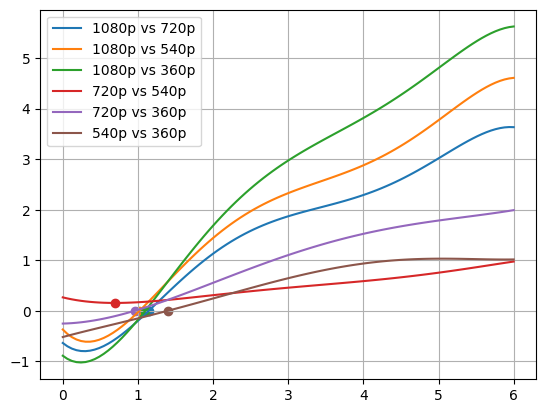

In [29]:
fig, axe = plt.subplots()
for (c1, c2), (l1, l2) in zip(itertools.combinations(curves, 2), itertools.combinations(labels, 2)):
    objective = factory(c1, c2)
    roots = np.roots(c1 - c2)
    solution = optimize.root(objective, x0=1.)
    print(l1, l2)
    print(roots)
    print(solution)
    axe.plot(xlin, objective(xlin), label="%s vs %s" % (l1, l2))
    axe.scatter(solution.x, objective(solution.x))
axe.legend()
axe.grid()

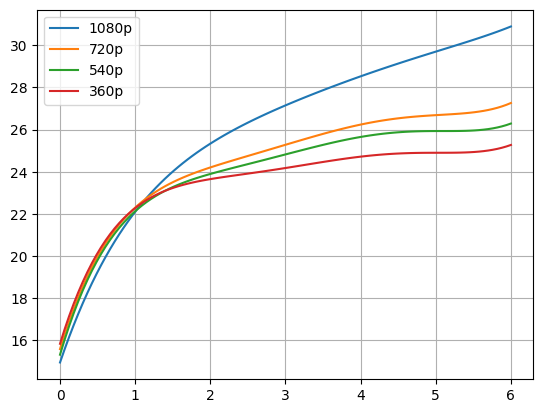

In [9]:
fig, axe = plt.subplots()
for (curve, label) in zip(curves, labels):
    axe.plot(xlin, np.poly1d(curve)(xlin), label=label)
axe.legend()
axe.grid()